### AUTOENCODERS

#### Dense Autoencoders

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoder = Sequential([layers.Dense(2, input_shape=[3])])
decoder = Sequential([layers.Dense(3, input_shape=[2])])

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer="sgd")

In [ ]:
import numpy as np

def generate_3d_data(m ,w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi/2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m)/2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w1 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [ ]:
autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2460
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2429
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2397
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2369
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2310
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2282
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2256
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2230
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2204
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2180
Epoch 12/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2156
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

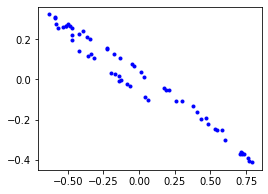

In [ ]:
import matplotlib.pyplot as plt

coding = autoencoder.predict(X_train)
plt.figure(figsize=(4, 3))
plt.plot(coding[:, 0], coding[:, 1], "b.")

In [ ]:
#load mnist

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [ ]:
## mnist autoencoder

stacked_encoder = Sequential([
                layers.Flatten(input_shape=[28, 28]), 
                layers.Dense(100, activation="selu"), 
                layers.Dense(30, activation="selu")
])
stacked_decoder = Sequential([
                layers.Dense(100, activation="selu", input_shape=[30]), 
                layers.Dense(28 * 28, activation="sigmoid"), 
                layers.Reshape([28, 28])
])

stacked_autoencoder = Sequential([
                stacked_encoder, stacked_decoder
])
stacked_autoencoder.compile(loss="binary_crossentropy", 
                optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [ ]:
stacked_autoencoder.fit(X_train, X_train, epochs=20, 
                        validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3358 - val_loss: 0.3110
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3046 - val_loss: 0.3013
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2974 - val_loss: 0.2958
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - val_loss: 0.2932
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2909 - val_loss: 0.2965
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2889 - val_loss: 0.2895
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2876 - val_loss: 0.2888
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2864 - val_loss: 0.2882
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2856 - val_loss: 0.2871
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, X_test=X_test, n_images=5):
    reconstruction = model.predict(X_test[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_test[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstruction[image_index])

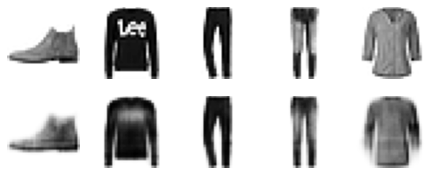

In [ ]:
show_reconstructions(stacked_autoencoder)

In [ ]:
!pip install sklearn --upgrade

In [ ]:
from sklearn.manifold import TSNE

X_test_compressed = stacked_encoder.predict(X_test)
tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)

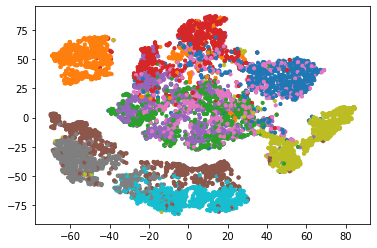

In [ ]:
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=10, cmap="tab10")

In [ ]:
class DenseTranspose(layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros", 
                                      shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [ ]:
dense_1 = layers.Dense(100, activation="selu")
dense_2 = layers.Dense(10, activation="selu")

tied_encoder = Sequential([
                layers.Flatten(input_shape=[28, 28]), 
                dense_1, dense_2
])

tied_decoder = Sequential([
                DenseTranspose(dense_2, activation="selu"), 
                DenseTranspose(dense_1, activation="sigmoid"), 
                layers.Reshape([28, 28])
])
tied_autoencoder = Sequential([
                    tied_encoder, tied_decoder
])

In [ ]:
tied_autoencoder.compile(
    loss="binary_crossentropy", 
    optimizer="sgd"
)
tied_autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6723
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5834
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5308
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5066
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4799
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4526
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4300
Epoch 8/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4125
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3995
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3898
Epoch 11/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3826
Epoch 12/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3771
E

#### Convolutional Autoencoders

In [ ]:
conv_encoder = Sequential([
                layers.Reshape([28, 28, 1], input_shape=[28, 28]), 
                layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"), 
                layers.MaxPool2D(pool_size=2), 
                layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"), 
                layers.MaxPool2D(pool_size=2), 
                layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"), 
                layers.MaxPool2D(pool_size=2)
])

conv_decoder = Sequential([
                layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid", 
                                       activation="selu", input_shape=[3, 3, 64]), 
                layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", 
                                       activation="selu"), 
                layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", 
                                       activation="sigmoid"), 
                layers.Reshape([28, 28])
])
conv_autoencoder = Sequential([conv_encoder, conv_decoder])

In [ ]:
conv_autoencoder.compile(
    loss="binary_crossentropy", 
    optimizer="sgd"
)
conv_autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.5857
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.4011
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3583
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3410
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3301


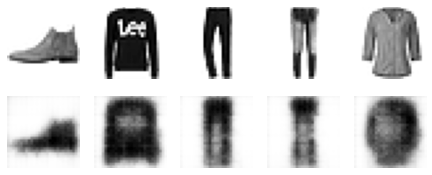

In [ ]:
show_reconstructions(conv_autoencoder)

#### Recurrent Autoencoders

In [ ]:
recurrent_encoder = Sequential([
                layers.LSTM(100, return_sequences=True, input_shape=[None, 28]), 
                layers.LSTM(30)
])

recurrent_decoder = Sequential([
                layers.RepeatVector(28, input_shape=[30]), 
                layers.LSTM(100, return_sequences=True), 
                layers.TimeDistributed(layers.Dense(28, activation="sigmoid"))
])
recurrent_autoencoder = Sequential([
                    recurrent_encoder, recurrent_decoder
])

In [ ]:
recurrent_autoencoder.compile(
    loss="binary_crossentropy", 
    optimizer = keras.optimizers.SGD(learning_rate=0.1)
)
recurrent_autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 128s 64ms/step - loss: 0.4964
Epoch 2/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.3847
Epoch 3/5
1875/1875 [==============================] - 104s 56ms/step - loss: 0.3580
Epoch 4/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.3453
Epoch 5/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.3357


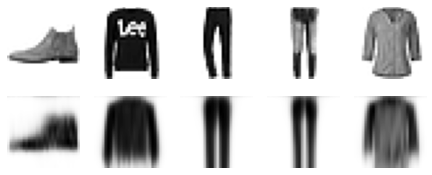

In [ ]:
show_reconstructions(recurrent_autoencoder)

#### Denoising Autoencoders

In [ ]:
dropout_encoder = Sequential([
                layers.Flatten(input_shape=[28, 28]), 
                layers.Dropout(0.5), 
                layers.Dense(100, activation="selu"), 
                layers.Dense(30, activation="selu")
])
dropout_decoder = Sequential([
                layers.Dense(100, activation="selu", input_shape=[30]), 
                layers.Dense(28 * 28, activation="sigmoid"), 
                layers.Reshape([28, 28])
])
dropout_autoencoder = Sequential([
                dropout_encoder, dropout_decoder
])

In [ ]:
dropout_autoencoder.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=0.1)
)
dropout_autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4733
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3716
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3551
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3421
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3332


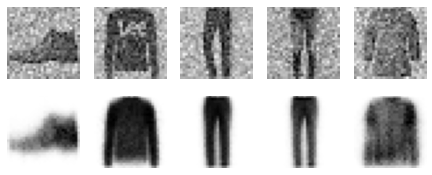

In [ ]:
noise = layers.GaussianNoise(0.2)
show_reconstructions(dropout_autoencoder, noise(X_test, training=True))

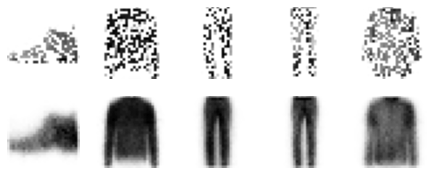

In [ ]:
dropout = layers.Dropout(0.5)
show_reconstructions(dropout_autoencoder, dropout(X_test, training=True))

#### Sparse Autoencoders

In [ ]:
sparse_l1_encoder = Sequential([
                layers.Flatten(input_shape=[28, 28]), 
                layers.Dense(100, activation="selu"), 
                layers.Dense(300, activation="sigmoid"), 
                layers.ActivityRegularization(l1=1e-3)
])
sparse_l1_decoder = Sequential([
                layers.Dense(100, activation="selu", 
                             input_shape=[300]), 
                layers.Dense(28 * 28, activation="sigmoid"), 
                layers.Reshape([28, 28])
])
sparse_autoencoder = Sequential([
                sparse_l1_encoder, sparse_l1_decoder
])

In [ ]:
sparse_autoencoder.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=0.1)
)
sparse_autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5754
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4858
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4473
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4179
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4020


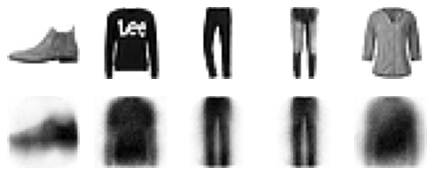

In [ ]:
show_reconstructions(sparse_autoencoder)

(0.0, 1.0, 0.0, 0.95)

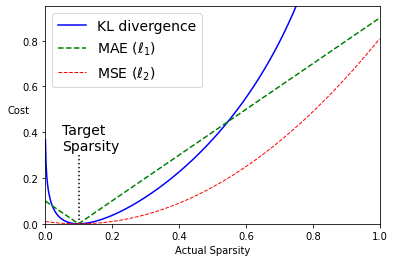

In [ ]:
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p/q) + (1-p) * np.log((1-p) / (1-q))
mse = (p - q) ** 2
mae = np.abs(p-q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nSparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual Sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])

In [ ]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight=weight
        self.target=target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) + 
            kl_divergence(1. - self.target, 1. - mean_activities))

In [ ]:
kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = Sequential([
                layers.Flatten(input_shape=[28, 28]), 
                layers.Dense(100, activation="selu"), 
                layers.Dense(300, activation="sigmoid", 
                             activity_regularizer=kld_reg)
])
sparse_kl_decoder = Sequential([
                layers.Dense(100, activation="selu"), 
                layers.Dense(28 * 28, activation="sigmoid"), 
                layers.Reshape([28, 28])
])
sparse_kl_autoencoder = Sequential([
                sparse_kl_encoder, sparse_kl_decoder
])

In [ ]:
sparse_kl_autoencoder.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=0.1)
)
sparse_kl_autoencoder.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5407
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4683
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4311
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4014
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3889
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3819
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3771
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3731
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3693
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3654


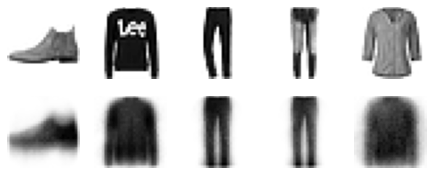

In [ ]:
show_reconstructions(sparse_kl_autoencoder)

#### Variational Autoencoders

In [ ]:
K = keras.backend

class Sampling(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [ ]:
coding_size = 10

inputs = layers.Input(shape=[28, 28])
z = layers.Flatten()(inputs)
z = layers.Dense(150, activation="selu")(z)
z = layers.Dense(100, activation="selu")(z)
coding_mean = layers.Dense(coding_size)(z)
coding_log_var = layers.Dense(coding_size)(z)
coding = Sampling()([coding_mean, coding_log_var])
variational_encoder = keras.Model(inputs=[inputs], 
        outputs=[coding_mean, coding_log_var, coding])

In [ ]:
decoder_inputs = layers.Input(shape=[coding_size])
x = layers.Dense(100, activation="selu")(decoder_inputs)
x = layers.Dense(150, activation="selu")(x)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = layers.Reshape([28, 28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], 
                                  outputs=[outputs])

In [ ]:
_, _, codings = variational_encoder(inputs)
reconstruction = variational_decoder(coding)
variational_autoencoder = keras.Model(inputs=[inputs], outputs=[reconstruction])

In [ ]:
latent_loss = -0.5 * K.sum(1 + coding_log_var - 
                           K.exp(coding_log_var) - 
                           K.square(coding_mean), axis=-1)
variational_autoencoder.add_loss(K.mean(latent_loss) / 784.)
variational_autoencoder.compile(loss="binary_crossentropy", 
                                optimizer="rmsprop")
variational_autoencoder.fit(X_train, X_train, epochs=25, batch_size=128, 
                            validation_data=(X_test, X_test))

Epoch 1/25
469/469 [==============================] - 12s 19ms/step - loss: 0.3859 - val_loss: 0.3552
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3420 - val_loss: 0.3361
Epoch 3/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3319 - val_loss: 0.3360
Epoch 4/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3267 - val_loss: 0.3308
Epoch 5/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3236 - val_loss: 0.3237
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3213 - val_loss: 0.3212
Epoch 7/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3197 - val_loss: 0.3207
Epoch 8/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3184 - val_loss: 0.3207
Epoch 9/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3173 - val_loss: 0.3179
Epoch 10/25
469/469 [==============================] - 6s 14ms/step - loss: 0.3165 - val_l

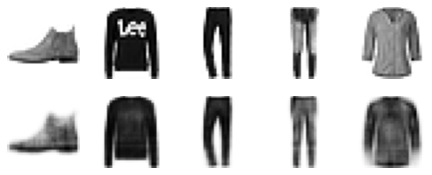

In [ ]:
show_reconstructions(variational_autoencoder)

In [105]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    # plt.figure(figsize=(n_rows, n_cols))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis('off')

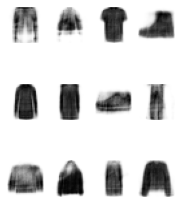

In [ ]:
tf.random.set_seed(42)
coding = tf.random.normal(shape=[12, coding_size])
images = variational_decoder(coding).numpy()
plot_multiple_images(images, 4)

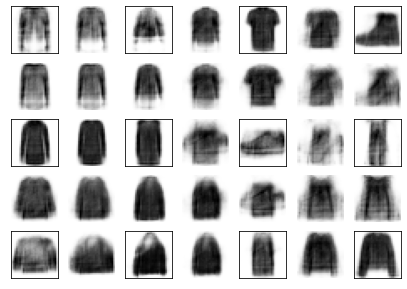

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

coding_grid = tf.reshape(coding, [1, 3, 4, coding_size])
x = coding_grid.numpy()
larger_grid = tf.image.resize(x, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, coding_size])
images = variational_decoder(interpolated_codings)

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index+1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")

### Generative Networks

#### Dense GANs

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, Model, callbacks
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

In [ ]:
codings_size = 30
generator = Sequential([
            layers.Dense(100, activation="selu", 
                         input_shape=[codings_size]), 
            layers.Dense(150, activation="selu"), 
            layers.Dense(28 * 28, activation="sigmoid"), 
            layers.Reshape([28, 28])
])
discriminator = Sequential([
            layers.Flatten(input_shape=[28, 28]), 
            layers.Dense(150, activation="selu"), 
            layers.Dense(100, activation="selu"), 
            layers.Dense(1, activation="sigmoid")
])

gan = Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("GAN Epoch {}/{} ...".format(1+epoch, n_epochs))
        for X_batch in dataset:
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_real, y1)
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 =  tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        # plot_multiple_images(generated_images[:5], 5)
        # plt.show()
# train_gan(gan, dataset, batch_size, codings_size)

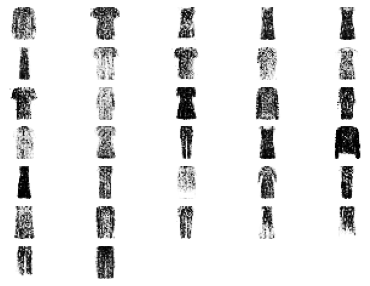

In [ ]:
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 5)

#### Convolutional GANs

In [ ]:
codings_size = 100
generator = Sequential([
            layers.Dense(7 * 7 * 128, input_shape=[codings_size]), 
            layers.Reshape([7, 7, 128]), 
            layers.BatchNormalization(), 
            layers.Conv2DTranspose(64, kernel_size=5, strides=2, 
                                   padding="same", activation="selu"), 
            layers.BatchNormalization(), 
            layers.Conv2DTranspose(1, kernel_size=5, strides=2, 
                                   padding="same", activation="tanh") 
])
discriminator = Sequential([
            layers.Conv2D(64, kernel_size=5, strides=2, padding="same", 
                          activation=layers.LeakyReLU(0.2), 
                          input_shape=[28, 28, 1]), 
            layers.Dropout(0.4), 
            layers.Conv2D(128, kernel_size=5, strides=2, padding="same", 
                          activation=layers.LeakyReLU(0.2)), 
            layers.Dropout(0.4), 
            layers.Flatten(), 
            layers.Dense(1, activation="sigmoid")
])
deep_conv_gan = Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", 
                      optimizer="rmsprop")
discriminator.trainable = False
deep_conv_gan.compile(loss="binary_crossentropy", 
                      optimizer="rmsprop")

In [ ]:
X_train_new = X_train.reshape(-1, 28, 28, 1) * 2. - 1.
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_new).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(deep_conv_gan, dataset, batch_size, codings_size, n_epochs=10)

GAN Epoch 1/10 ...
GAN Epoch 2/10 ...
GAN Epoch 3/10 ...
GAN Epoch 4/10 ...
GAN Epoch 5/10 ...
GAN Epoch 6/10 ...
GAN Epoch 7/10 ...
GAN Epoch 8/10 ...
GAN Epoch 9/10 ...
GAN Epoch 10/10 ...


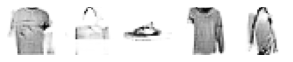

In [ ]:
noise = tf.random.normal(shape=[5, codings_size])
generated_image = generator(noise)
plt.figure(figsize=(5, 7))
plot_multiple_images(generated_image, 5)
plt.show()

In [ ]:
train_gan(deep_conv_gan, dataset, batch_size, codings_size, n_epochs=20)

GAN Epoch 1/20 ...
GAN Epoch 2/20 ...
GAN Epoch 3/20 ...
GAN Epoch 4/20 ...
GAN Epoch 5/20 ...
GAN Epoch 6/20 ...
GAN Epoch 7/20 ...
GAN Epoch 8/20 ...
GAN Epoch 9/20 ...
GAN Epoch 10/20 ...
GAN Epoch 11/20 ...
GAN Epoch 12/20 ...
GAN Epoch 13/20 ...
GAN Epoch 14/20 ...
GAN Epoch 15/20 ...
GAN Epoch 16/20 ...
GAN Epoch 17/20 ...
GAN Epoch 18/20 ...
GAN Epoch 19/20 ...
GAN Epoch 20/20 ...


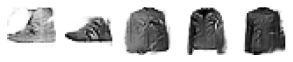

In [ ]:
noise = tf.random.normal(shape=[5, codings_size])
generated_image = generator(noise)
plt.figure(figsize=(5, 7))
plot_multiple_images(generated_image, 5)
plt.show()

In [ ]:
train_gan(deep_conv_gan, dataset, batch_size, codings_size, n_epochs=20)

GAN Epoch 1/20 ...
GAN Epoch 2/20 ...
GAN Epoch 3/20 ...
GAN Epoch 4/20 ...
GAN Epoch 5/20 ...
GAN Epoch 6/20 ...
GAN Epoch 7/20 ...
GAN Epoch 8/20 ...
GAN Epoch 9/20 ...
GAN Epoch 10/20 ...
GAN Epoch 11/20 ...
GAN Epoch 12/20 ...
GAN Epoch 13/20 ...
GAN Epoch 14/20 ...
GAN Epoch 15/20 ...
GAN Epoch 16/20 ...
GAN Epoch 17/20 ...
GAN Epoch 18/20 ...
GAN Epoch 19/20 ...
GAN Epoch 20/20 ...


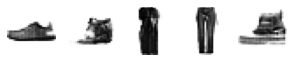

In [ ]:
noise = tf.random.normal(shape=[5, codings_size])
generated_image = generator(noise)
plt.figure(figsize=(5, 7))
plot_multiple_images(generated_image, 5)
plt.show()

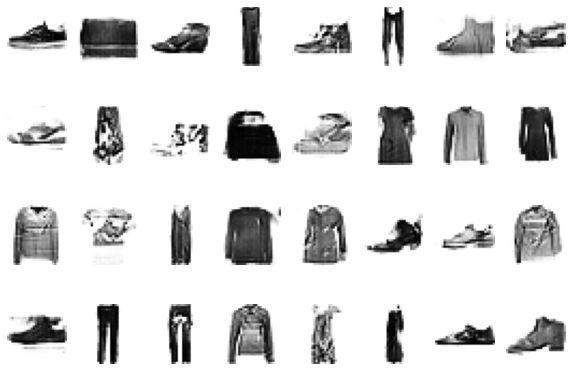

In [ ]:
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_image = generator(noise)
plt.figure(figsize=(10, 7))
plot_multiple_images(generated_image, 8)
plt.show()

### Exercise

#### 9.

In [121]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, Model, callbacks
import numpy as np
import matplotlib.pyplot as plt

In [122]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis('off')

In [123]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

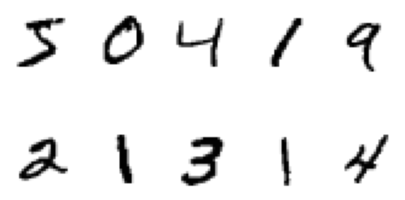

In [124]:
plt.figure(figsize=(7, 4))
plot_multiple_images(X_train[:10], 5)

In [125]:
noise = tf.random.normal(shape=X_train.shape, mean=0, stddev=0.2)
X_train_noised = X_train + noise
noise = tf.random.normal(shape=X_test.shape, mean=0, stddev=0.2)
X_test_noised = X_test + noise

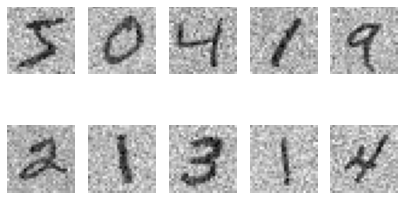

In [126]:
plt.figure(figsize=(7, 4))
plot_multiple_images(X_train_noised[:10], 5)

In [127]:
encoder = Sequential([
            layers.Flatten(input_shape=[28, 28]), 
            layers.Dropout(0.2),
            layers.Dense(128, activation="selu"), 
            layers.Dense(64, activation="selu"), 
            layers.Dense(32, activation="selu")
])
decoder = Sequential([
            layers.Dense(64, activation="selu", input_shape=[32]), 
            layers.Dense(128, activation="selu"), 
            layers.Dense(28 * 28, activation="selu"), 
            layers.Reshape([28, 28])
])
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer="nadam")

In [128]:
autoencoder.fit(X_train_noised, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0349
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0244
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0224
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0212
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0203
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0196
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0191
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0187
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0184
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0182


In [129]:
denoised_pred = autoencoder.predict(X_test_noised[:100])

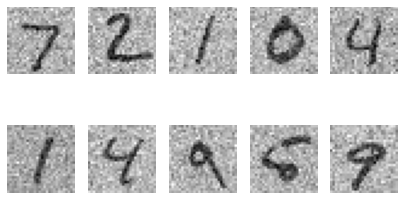

In [130]:
plt.figure(figsize=(7, 4))
plot_multiple_images(X_test_noised[:10], 5)

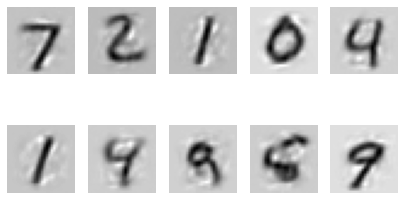

In [131]:
plt.figure(figsize=(7, 4))
plot_multiple_images(denoised_pred[:10], 5)

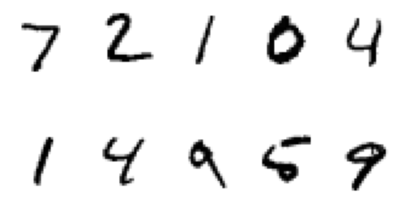

In [132]:
plt.figure(figsize=(7, 4))
plot_multiple_images(X_test[:10], 5)

In [133]:
## classification
model = Sequential([
            encoder, 
            layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.Nadam(learning_rate=5e-4), 
              metrics=["accuracy"])
model.fit(X_train_noised[:500], y_train[:500], epochs=100, 
          validation_data=(X_test_noised[100:200], y_test[100:200]), 
          callbacks=[callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 2.5450 - accuracy: 0.1820 - val_loss: 2.0791 - val_accuracy: 0.3000
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 1.6578 - accuracy: 0.4320 - val_loss: 1.5498 - val_accuracy: 0.5100
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 1.1853 - accuracy: 0.6500 - val_loss: 1.2201 - val_accuracy: 0.6500
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.8642 - accuracy: 0.7900 - val_loss: 1.0193 - val_accuracy: 0.7200
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6526 - accuracy: 0.8480 - val_loss: 0.8334 - val_accuracy: 0.7500
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5235 - accuracy: 0.8900 - val_loss: 0.7252 - val_accuracy: 0.7600
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4279 - accuracy: 0.9040 - val_loss: 0.6415 - val_accuracy: 0.7700
Epoch 8/100


In [134]:
model.evaluate(X_test_noised, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.8315


[0.5565751791000366, 0.8314999938011169]

In [135]:
y_pred = tf.argmax(model.predict(X_test_noised), axis=1)

In [136]:
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 4, 7])>

In [137]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

#### 10.

In [138]:
K = keras.backend

class Sampling(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [147]:
codings_size = 4 * 4

inputs = layers.Input(shape=[28, 28])
z = layers.Flatten()(inputs)
z = layers.Dense(14 * 14, activation="selu")(z)
z = layers.Dropout(0.4)(z)
z = layers.Dense(8 * 8, activation="selu")(z)
mean = layers.Dense(codings_size)(z)
log_var = layers.Dense(codings_size)(z)
coding = Sampling()([mean, log_var])
variational_encoder = keras.Model(inputs=[inputs], 
                      outputs=[mean, log_var, coding])

In [148]:
variational_decoder = Sequential([
            layers.Dense(7 * 7, activation="selu", input_shape=[codings_size]), 
            layers.Dense(16 * 16, activation="selu"), 
            layers.Dense(28 * 28, activation="sigmoid"), 
            layers.Reshape([28, 28])
])

In [149]:
_, _, codings = variational_encoder(inputs)
reconstruction = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], 
                             outputs=[reconstruction])

In [150]:
latent_loss = -0.5 * K.sum(1 + log_var - 
                           K.exp(log_var) - 
                           K.square(mean), axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", 
                       optimizer="rmsprop")

In [151]:
variational_ae.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1962
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1680
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1617
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1585
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1565


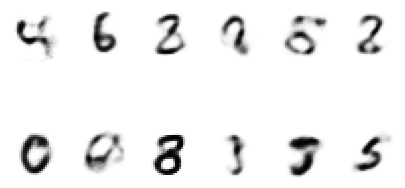

In [161]:
tf.random.set_seed(1400)
dist = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(dist)
plt.figure(figsize=(7, 4))
plot_multiple_images(images, 6)

In [162]:
tf.argmax(model.predict(images), axis=1)

<tf.Tensor: shape=(12,), dtype=int64, numpy=array([4, 6, 8, 9, 5, 8, 0, 2, 8, 1, 7, 5])>

#### 11.